In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_bank = pd.read_csv('Customer-Churn-Records.csv')
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Limpeza de dados
 
Nessa etapa vamos fazer a limpeza de dados, onde veremos se há valores ausentes no dataframe e exibir
a porcentagem de valores ausentes em cada coluna, em seguida (caso haja), vamos preencher os valores 
ausentes, checar novamente se ainda há algum valor ausente e em seguida eliminar as duplciatas.

In [10]:
# 1. Verificar valores ausentes em cada coluna
print("Quantidade de valores ausentes em cada coluna:")
print(df_bank.isnull().sum())

# 2. Verificar a porcentagem de valores ausentes
print("\nPorcentagem de valores ausentes em cada coluna:")
print(df_bank.isnull().mean() * 100)

# 3. Verificar os tipos das colunas
print("\nTipos das colunas:")
print(df_bank.dtypes)

# Separar as colunas numéricas e categóricas
numerical_cols = df_bank.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_bank.select_dtypes(include=['object']).columns

# 5. Verificar duplicatas no dataframe
print("\nQuantidade de duplicatas:")
print(df_bank.duplicated().sum())

# 6. Remover duplicatas, se houver
df_bank = df_bank.drop_duplicates()

# 7. Verificar o número de duplicatas após remoção
print("\nQuantidade de duplicatas após remoção:")
print(df_bank.duplicated().sum())

Quantidade de valores ausentes em cada coluna:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Porcentagem de valores ausentes em cada coluna:
RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned     

#  Análise Exploratória de Dados (EDA)

Nessa etapa descreveremos estatísticas gerais, utilizando df.describe() para insights iniciais.
Plotaremos distribuições de variáveis usando sns.histplot() e sns.boxplot() para visualizar variáveis
numéricas.

In [4]:
# Estatísticas descritivas para variáveis numéricas
df_bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


<Figure size 1200x1000 with 0 Axes>

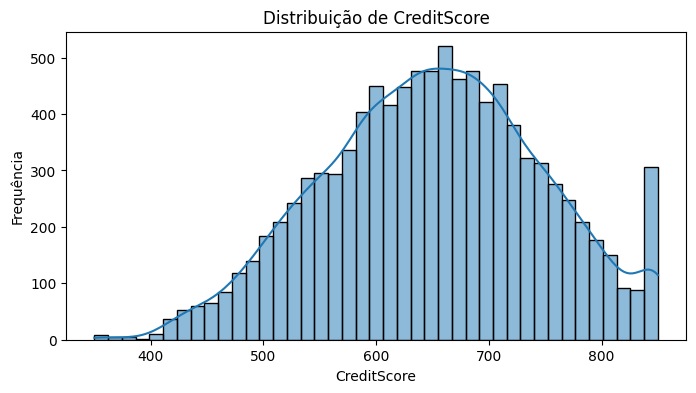

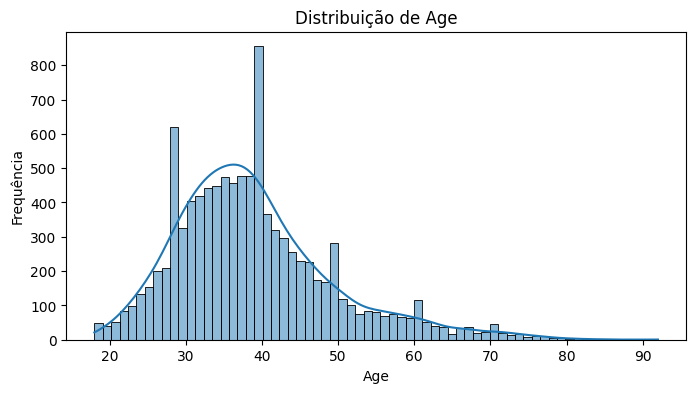

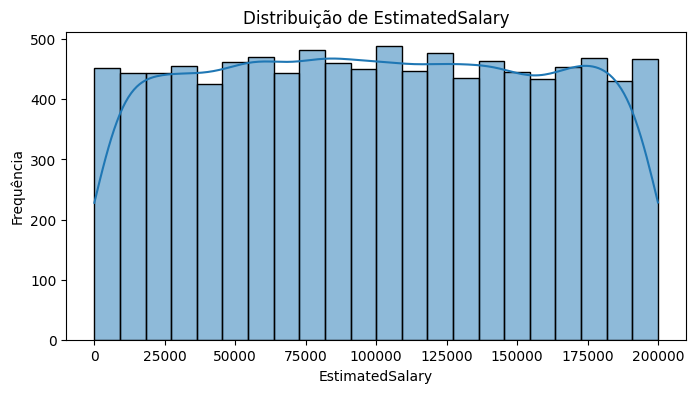

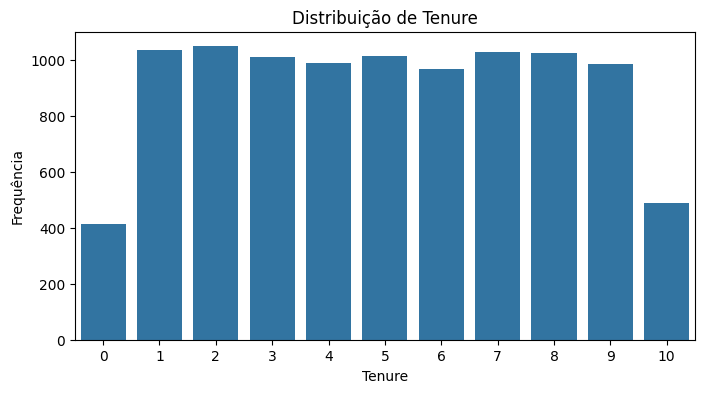

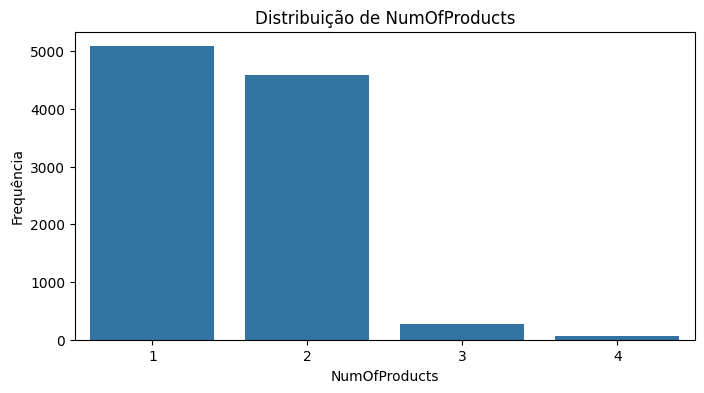

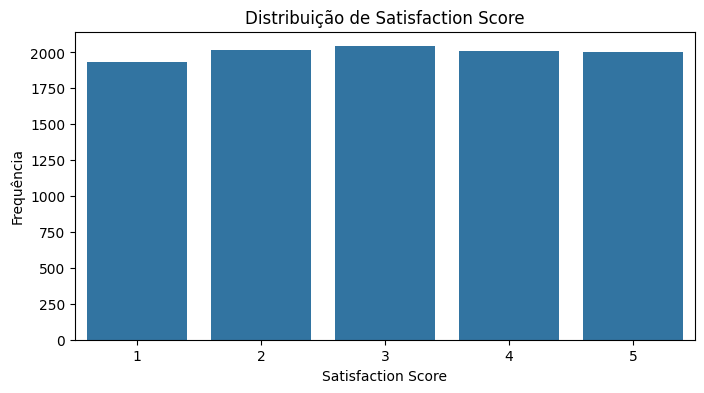

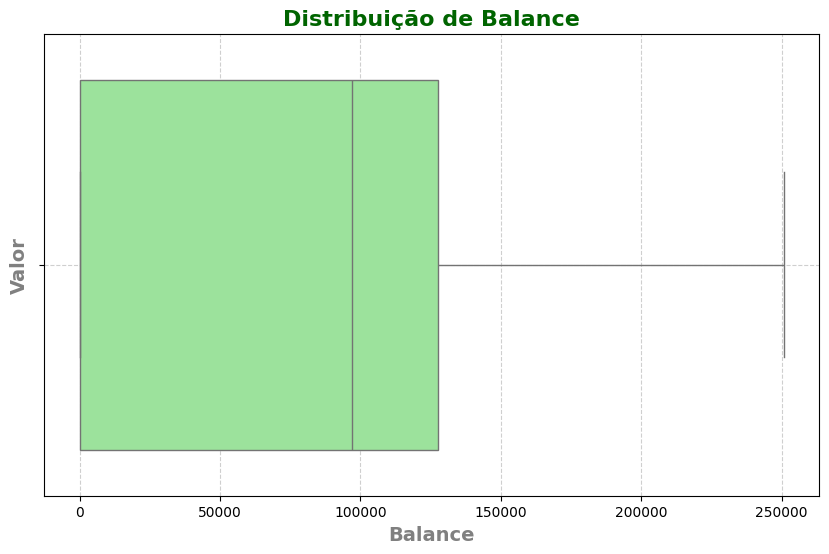

In [5]:
# Criando uma listas com as colunas numéricas
colunas_numericas1 = [
    'CreditScore', 'Age', 'EstimatedSalary',
]

colunas_numericas2 = [
    'Tenure', 'NumOfProducts', 'Satisfaction Score'
]

plt.figure(figsize=(12, 10))

# Plotando cada variável da lista 1 individualmente.
for coluna in colunas_numericas1:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_bank[coluna], kde=True)
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()

# Plotando cada varíavel da lista 2 individualmente
for coluna in colunas_numericas2:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_bank[coluna])
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()

# Plotando a varíavel Balance individualmente
plt.figure(figsize=(10,6))
sns.boxplot(x=df_bank['Balance'], color='lightgreen')
plt.title('Distribuição de Balance', fontsize=16, weight='bold', color='darkgreen')
plt.xlabel('Balance', fontsize=14, weight='bold', color='gray')
plt.ylabel('Valor', fontsize=14, weight='bold', color='gray')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
    


# Visualizações de Variáveis Categóricas

Nessa etapa analisaremos algumas variáveis usando o gráficos de barras para observar padrões.
Estudaremos o impacto de variáveis como Card Type e HasCrCard, ou Gender e Geography para
verificar como influenciam o churn.

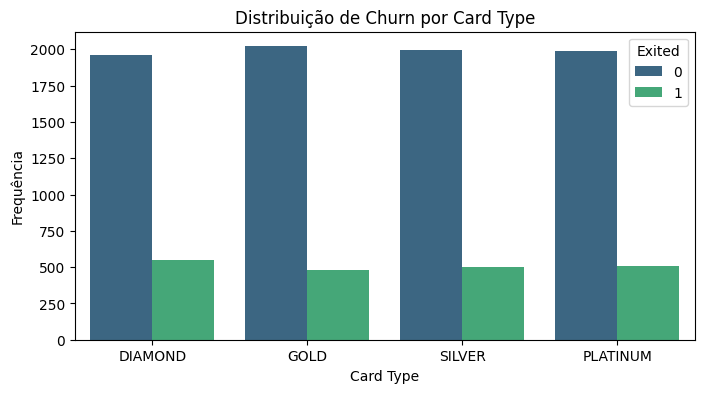

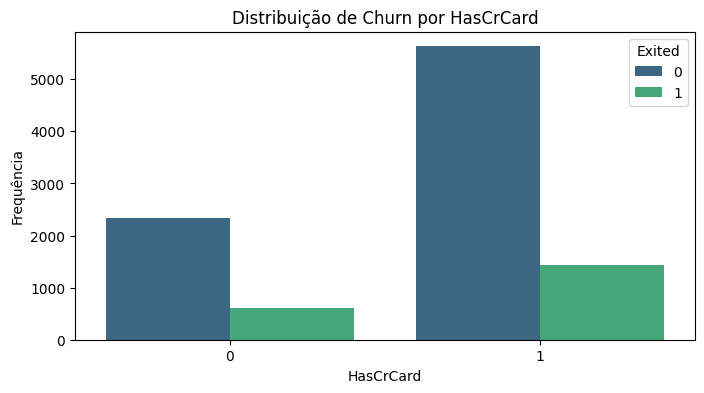

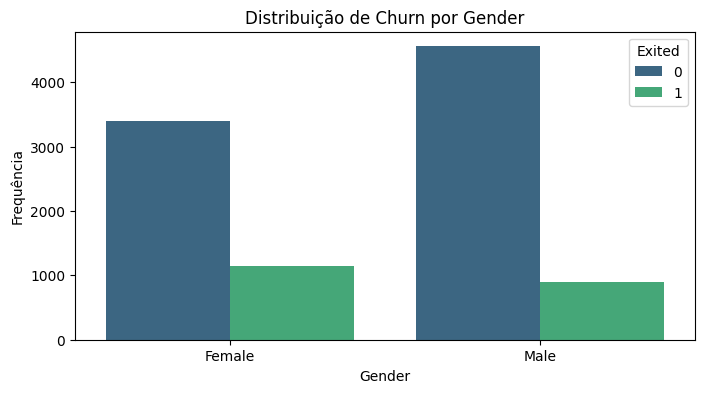

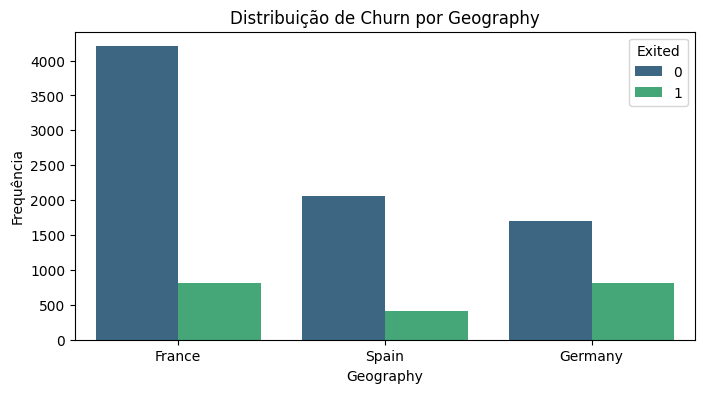

In [6]:
#Plotando a distribuição de churn entre tipos de cartões de crédito diferentes, e caso o cliente possui ou não um cartão de crédito
for coluna in ['Card Type', 'HasCrCard']:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_bank[coluna], hue=df_bank['Exited'], palette="viridis", dodge=True)
    plt.title(f'Distribuição de Churn por {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.legend(title='Status de Saída', loc='upper right') 
    plt.show()

for coluna in ['Gender', 'Geography']:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_bank[coluna], hue=df_bank['Exited'], palette="viridis", dodge=True)
    plt.title(f'Distribuição de Churn por {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.legend(title='Status de Saída', loc='upper right')
    plt.show()


# Análise de Correlação

Nessa etapa calcularemos a matriz de correlação usando df.corr() e visualizaremos com sns.heatmap().
Também identificaremos variáveis fortemente correlacionadas destacando variáveis que podem afetar o
churn.

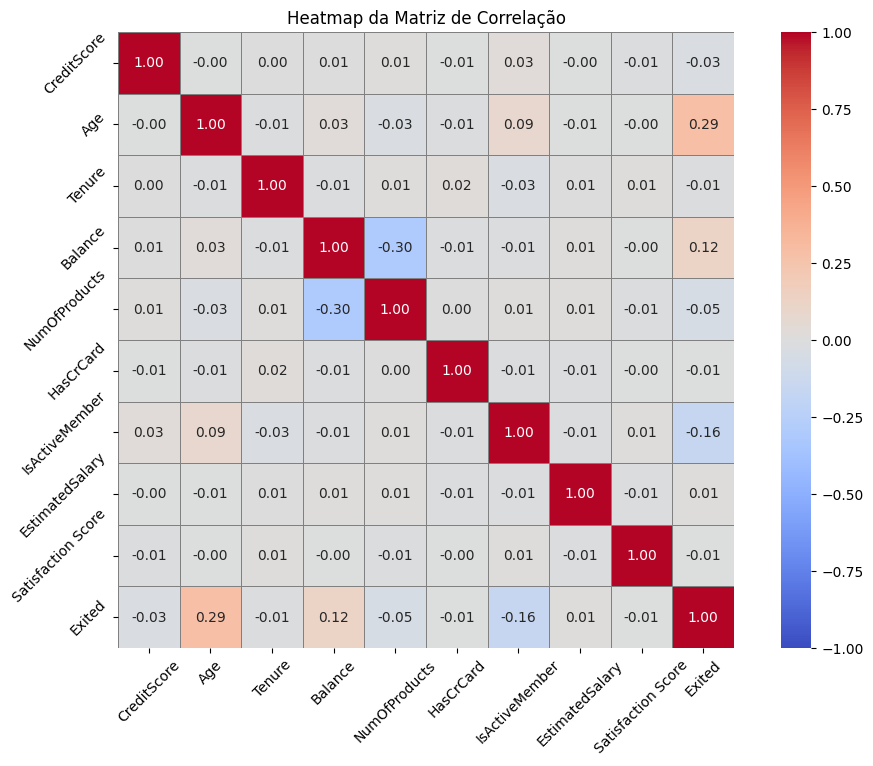

In [7]:
#Criando lista com as variáveis numéricas
colunas_numericas = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
    'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Exited'
]

matriz_correlacao = df_bank[colunas_numericas].corr()

plt.figure(figsize=(12, 8))

# Criando o mapa de calor
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, 
            linewidths=0.5, linecolor='gray', vmin=-1, vmax=1)

plt.title('Heatmap da Matriz de Correlação')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# Análise Bivariada

Nessa etapa vamos comparar variáveis com Exited usando sns.countplot() para visualizar a distribuição e sns.violinplot() ou sns.kdeplot para analisar a densidade em
valores diferentes, assim comparando os grupos.
Exploraremos combinações como Age e Tenure para entender como afetam a decisão de saída

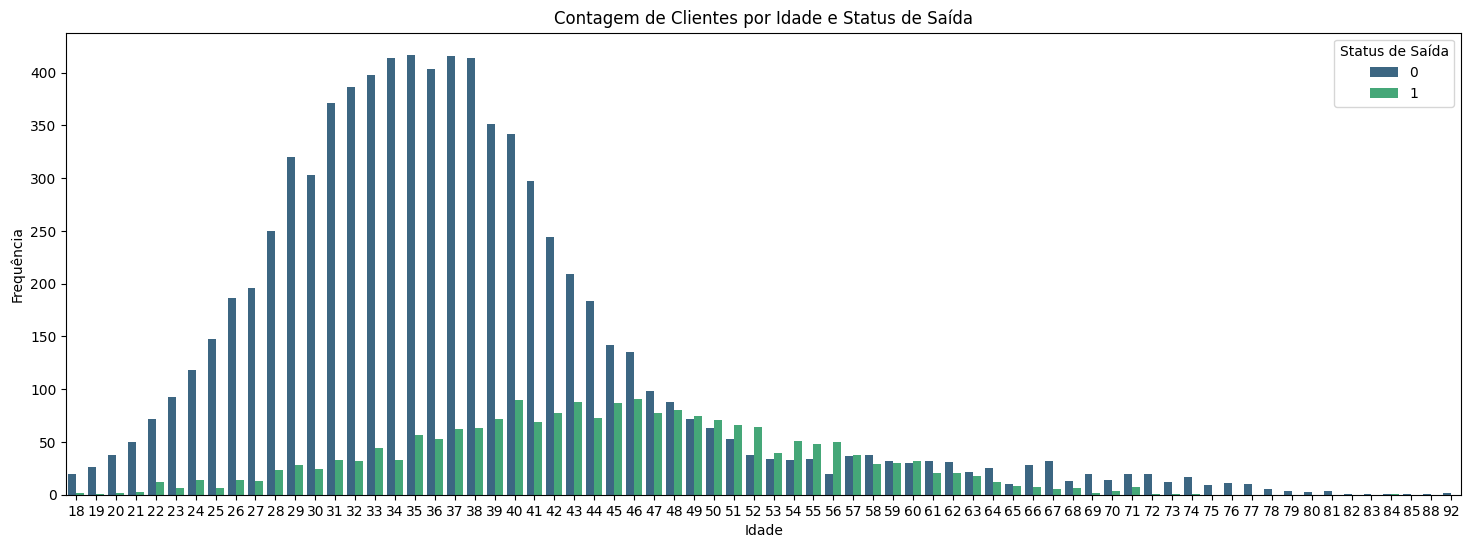

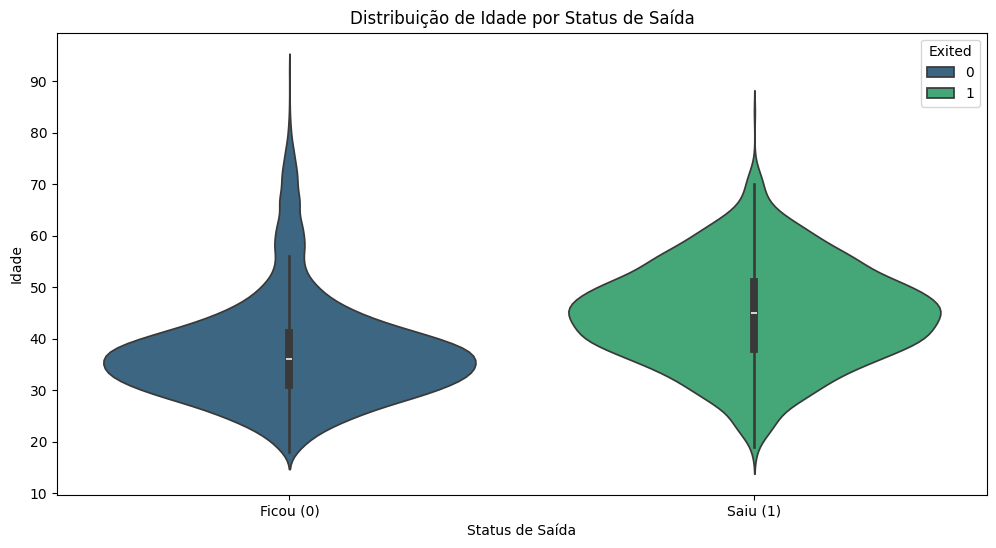

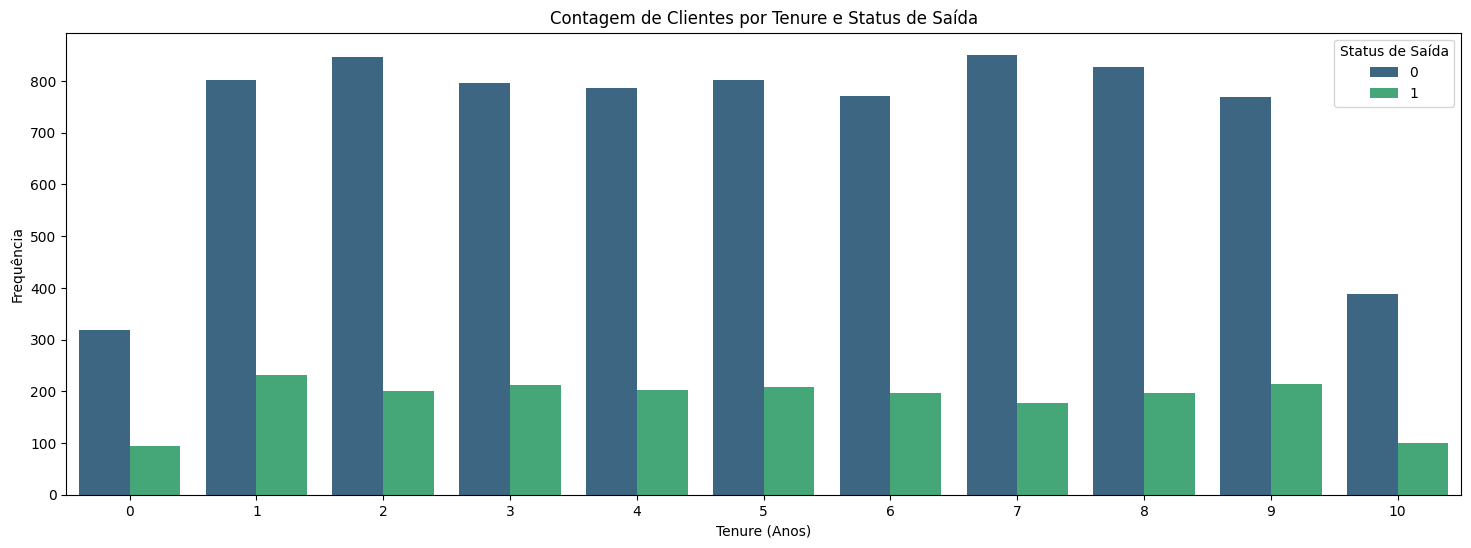

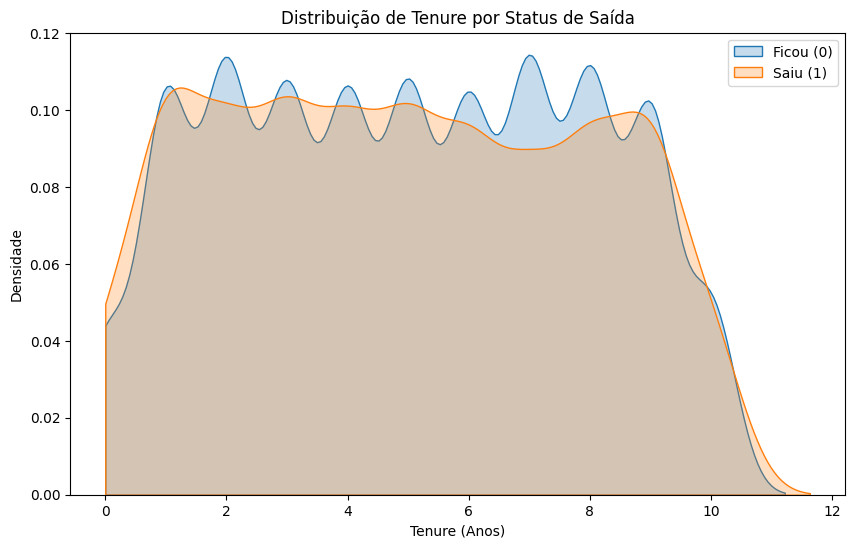

In [12]:
#Plotando a distribuição de clientes por idade e status de saída
plt.figure(figsize=(18, 6))
sns.countplot(data=df_bank, x='Age', hue='Exited', palette='viridis', dodge=True)
plt.title('Contagem de Clientes por Idade e Status de Saída')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(title='Status de Saída', loc='upper right')
plt.xticks(rotation=0)
plt.show()

#Agora utilizamos o violinplot para visualizar a densidade em valores diferentes
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_bank, x='Exited', y='Age', hue='Exited', palette='viridis')
plt.title('Distribuição de Idade por Status de Saída')
plt.xlabel('Status de Saída')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Ficou (0)', 'Saiu (1)'])
plt.show()

#Plotando a distribuição de clientes por quanto tempo o cliente pertence ao banco e status de saída
plt.figure(figsize=(18, 6))
sns.countplot(data=df_bank, x='Tenure', hue='Exited', palette='viridis', dodge=True)
plt.title('Contagem de Clientes por Tenure e Status de Saída')
plt.xlabel('Tenure (Anos)')
plt.ylabel('Frequência')
plt.legend(title='Status de Saída', loc='upper right')
plt.xticks(rotation=0)
plt.show()

#Agora utilizamos o kdeplot para visualizar a densidade em valores diferentes
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_bank[df_bank['Exited'] == 0], x='Tenure', label='Ficou (0)', fill=True, bw_adjust=0.85, clip=(0, None))
sns.kdeplot(data=df_bank[df_bank['Exited'] == 1], x='Tenure', label='Saiu (1)', fill=True, bw_adjust=0.85, clip=(0, None))
plt.title('Distribuição de Tenure por Status de Saída')
plt.xlabel('Tenure (Anos)')
plt.ylabel('Densidade')
plt.legend()
plt.show()



# Preparação dos Dados para Modelagem

Transformaremos as variáveis categóricas usando pd.get_dummies() para codificação.
Iremos escalonar as variáveis numéricas usando o StandardScaler para uniformizar as escalas

In [12]:
from sklearn.preprocessing import StandardScaler

# 1. Separando colunas numéricas das colunas categóricas
categorical_cols = ['Geography', 'Gender', 'Card Type', 'HasCrCard', 'IsActiveMember'] 
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score'] 

# 2. Applicar pd.get_dummies() para as colunas categóricas
df_encoded = pd.get_dummies(df_bank, columns=categorical_cols, drop_first=True)  # drop_first=True para evitar multicolinearidade

# 3. Uniformizar as colunas numéricas usando o StandardScaler
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Agora df_encoded está pronto para modelagem
print(df_encoded.head())


   RowNumber  CustomerId   Surname  CreditScore       Age    Tenure   Balance  \
0          1    15634602  Hargrave    -0.326221  0.293517 -1.041760 -1.225848   
1          2    15647311      Hill    -0.440036  0.198164 -1.387538  0.117350   
2          3    15619304      Onio    -1.536794  0.293517  1.032908  1.333053   
3          4    15701354      Boni     0.501521  0.007457 -1.387538 -1.225848   
4          5    15737888  Mitchell     2.063884  0.388871 -1.041760  0.785728   

   NumOfProducts  EstimatedSalary  Exited  ...  Satisfaction Score  \
0      -0.911583         0.021886       1  ...           -0.721130   
1      -0.911583         0.216534       0  ...           -0.009816   
2       2.527057         0.240687       1  ...           -0.009816   
3       0.807737        -0.108918       0  ...            1.412812   
4      -0.911583        -0.365276       0  ...            1.412812   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464         